# RBIG Walk-Through (Naive)

This is a quick tutorial to show how the RBIG algorithm itself can be implemented very simply using standard scikit-learn tools. It consists of the following two steps 1) marginal Gaussianization and 2) rotation.

In [3]:
import numpy as np
import warnings
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA
from scipy.stats import rv_histogram, norm
import pandas as pd
import seaborn as sns

!pip install "git+https://github.com/IPL-UV/rbig.git"
from rbig import RBIG

import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore') # get rid of annoying warnings

%matplotlib inline
%load_ext autoreload
%autoreload 2

  Cloning https://github.com/IPL-UV/rbig.git to /tmp/pip-req-build-yhkw057v
  Running command git clone -q https://github.com/IPL-UV/rbig.git /tmp/pip-req-build-yhkw057v
  Created wheel for py-rbig: filename=py_rbig-0.0.1-cp36-none-any.whl size=31674 sha256=1d99d7cbf17779eac0300fb9e9b4dca6e798ef3cf85203e95da60de469e7a477
  Stored in directory: /tmp/pip-ephem-wheel-cache-b3jphds8/wheels/44/83/b6/1b809fcf994755ddd81da1fb7a4e11089ac23861253e5881b6
Successfully built py-rbig
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Helper Plot Function
def plot_2d_joint(data, savename=None):
    fig  = plt.figure(figsize=(12, 5))

    g = sns.jointplot(x=data[:, 0], y=data[:, 1], kind='scatter', color='blue', alpha=0.1)
    g.ax_joint.set_xticks([])
    g.ax_joint.set_yticks([])
    plt.tight_layout()
    if savename:
        g.savefig(f"{savename}/rbig_0_data.png", transparent=True)
    plt.show()
    return None

## Data

2020-11-05 17:26:04,766: INFO: NumExpr defaulting to 2 threads.


<Figure size 864x360 with 0 Axes>

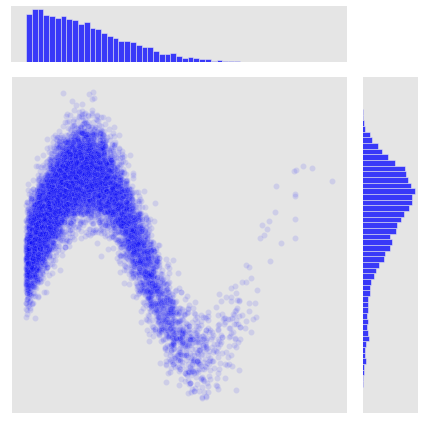

In [5]:
seed = 123
rng = np.random.RandomState(seed=seed)

num_samples = 10000
x = np.abs(2 * rng.randn(1, num_samples))
y = np.sin(x) + 0.25 * rng.randn(1, num_samples)
data = np.vstack((x, y)).T

d_dimensions = data.shape[1]

plot_2d_joint(data)

## Step I - Marginal Gaussianization

In this tutorial, for simplicity, I will use the quantile transformer found in the sklearn library. This transformer does an estimate of the CDF for each feature independently. Then the values are mapped to the Guassian distribution from the learned CDF function.

In [6]:
n_quantiles = 1000
output_distribution = 'normal'
random_state = 123
subsample = 2000

# Quantile Transformer
mg_transformer = QuantileTransformer(
    n_quantiles=n_quantiles, 
    output_distribution=output_distribution, subsample=subsample
)

data_mg = mg_transformer.fit_transform(data)

<Figure size 864x360 with 0 Axes>

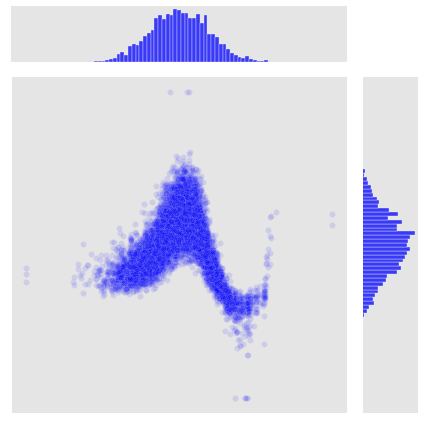

In [7]:
plot_2d_joint(data_mg)

### Step II - Rotation (PCA)

In [8]:
pca_model = PCA()

data_rot = pca_model.fit_transform(data_mg)

<Figure size 864x360 with 0 Axes>

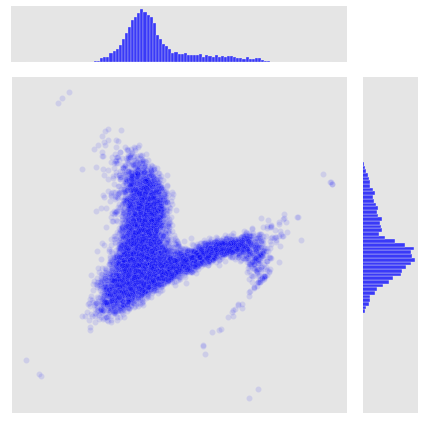

In [9]:
plot_2d_joint(data_rot)